In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
train_df = pd.read_csv('/Users/markun/git/SIGNATE/ai_quest/train.csv')
train_df.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [3]:
train_df['bed_type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Airbed', 'Futon', 'Couch'],
      dtype=object)

In [4]:
train_df['cancellation_policy'].unique()

array(['flexible', 'strict', 'moderate', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [5]:
train_df['city'].unique()

array(['LA', 'DC', 'NYC', 'SF', 'Chicago', 'Boston'], dtype=object)

In [6]:
train_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [7]:
test_df = pd.read_csv('/Users/markun/git/SIGNATE/ai_quest/test.csv')
test_df.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,...,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,...,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,...,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,...,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,...,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [8]:
sub_df = pd.read_csv('/Users/markun/git/SIGNATE/ai_quest/sample_submit.csv')
sub_df.head()

,0,10
0,1,10
1,2,10
2,3,10
3,4,10
4,5,10


In [9]:
y_df = train_df['y']
y_df

0        138.0
1         42.0
2         65.0
3        166.0
4        165.0
         ...  
55578    340.0
55579     30.0
55580    100.0
55581     38.0
55582     50.0
Name: y, Length: 55583, dtype: float64

In [10]:
train_df.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   147
bed_type                      0
bedrooms                     71
beds                         96
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              11908
host_has_profile_pic        148
host_identity_verified      148
host_response_rate        13704
host_since                  148
instant_bookable              0
last_review               11880
latitude                      0
longitude                     0
name                          0
neighbourhood              5160
number_of_reviews             0
property_type                 0
review_scores_rating      12556
room_type                     0
thumbnail_url              6145
zipcode                     716
y                             0
dtype: int64

In [11]:
train_df.describe()

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
count,55583.000000,55583.000000,55436.000000,55512.000000,55487.000000,55583.000000,55583.000000,55583.000000,43027.000000,55583.000000
mean,27791.000000,3.152906,1.236426,1.265312,1.711770,38.450812,-92.342406,20.937283,94.077928,160.163647
std,16045.574343,2.153001,0.583074,0.849319,1.257822,3.080869,21.687844,37.951889,7.802154,168.087140
min,0.000000,1.000000,0.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,1.000000
25%,13895.500000,2.000000,1.000000,1.000000,1.000000,34.128205,-118.341876,1.000000,92.000000,74.000000
50%,27791.000000,2.000000,1.000000,1.000000,1.000000,40.663312,-76.995602,6.000000,96.000000,111.000000
75%,41686.500000,4.000000,1.000000,1.000000,2.000000,40.746146,-73.954703,23.000000,100.000000,185.000000
max,55582.000000,16.000000,8.000000,10.000000,18.000000,42.390437,-70.999166,605.000000,100.000000,1999.000000


In [12]:
train_df.dtypes

id                          int64
accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
thumbnail_url              object
zipcode                    object
y                         float64
dtype: object

In [13]:
train_df['first_review'] #datatimeに変える？

0        2016-07-27
1        2016-09-12
2        2016-06-15
3        2014-03-15
4        2015-08-05
            ...    
55578    2013-02-27
55579    2015-11-29
55580    2016-03-02
55581    2016-10-18
55582           NaN
Name: first_review, Length: 55583, dtype: object

In [14]:
train_df['host_identity_verified'] = train_df['host_identity_verified'].replace('f',0)
train_df['host_identity_verified'] = train_df['host_identity_verified'].replace('t',1)
test_df['host_identity_verified'] = test_df['host_identity_verified'].replace('f',0)
test_df['host_identity_verified'] = test_df['host_identity_verified'].replace('t',1)

In [15]:
train_df['host_identity_verified']

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
55578    1.0
55579    1.0
55580    0.0
55581    1.0
55582    0.0
Name: host_identity_verified, Length: 55583, dtype: float64

In [16]:
train_df['host_has_profile_pic'] = train_df['host_has_profile_pic'].replace('t',1)
train_df['host_has_profile_pic'] = train_df['host_has_profile_pic'].replace('f',0)
test_df['host_has_profile_pic'] = test_df['host_has_profile_pic'].replace('t',1)
test_df['host_has_profile_pic'] = test_df['host_has_profile_pic'].replace('f',0)

In [17]:
train_df['host_has_profile_pic']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
55578    1.0
55579    1.0
55580    1.0
55581    1.0
55582    1.0
Name: host_has_profile_pic, Length: 55583, dtype: float64

In [18]:
train_df['host_response_rate'].unique()

array([nan, '100%', '70%', '0%', '99%', '90%', '75%', '80%', '97%', '60%',
       '96%', '95%', '87%', '50%', '94%', '83%', '40%', '82%', '20%',
       '88%', '91%', '86%', '93%', '92%', '67%', '71%', '43%', '79%',
       '85%', '89%', '54%', '98%', '65%', '33%', '22%', '17%', '78%',
       '76%', '56%', '84%', '69%', '25%', '30%', '74%', '73%', '29%',
       '77%', '38%', '81%', '68%', '42%', '57%', '44%', '58%', '64%',
       '36%', '62%', '10%', '63%', '72%', '53%', '61%', '52%', '55%',
       '35%', '13%', '6%', '27%', '59%', '46%', '14%', '26%', '31%',
       '47%', '66%', '21%', '15%', '41%', '39%'], dtype=object)

In [19]:
train_df['host_response_rate'] = train_df['host_response_rate'].fillna('50%')
test_df['host_response_rate'] = test_df['host_response_rate'].fillna('50%')

In [20]:
train_df['host_response_rate']

0         50%
1        100%
2        100%
3        100%
4        100%
         ... 
55578    100%
55579     50%
55580     50%
55581    100%
55582    100%
Name: host_response_rate, Length: 55583, dtype: object

In [21]:
train_df = train_df.drop(['zipcode','thumbnail_url','description','name','last_review','first_review','amenities','neighbourhood','host_since','review_scores_rating','host_has_profile_pic','y'],axis = 1)
test_df = test_df.drop(['zipcode','thumbnail_url','description','name','last_review','first_review','amenities','neighbourhood','host_since','review_scores_rating','host_has_profile_pic'],axis = 1)

In [22]:
train_df

,id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,property_type,room_type
0,0,6,2.0,Real Bed,1.0,4.0,flexible,LA,t,0.0,50%,f,33.788931,-118.154761,1,Apartment,Private room
1,1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,1.0,100%,f,38.934810,-76.978190,9,House,Private room
2,2,2,2.0,Real Bed,1.0,1.0,strict,NYC,t,0.0,100%,t,40.695118,-73.926240,27,Apartment,Private room
3,3,2,1.0,Real Bed,1.0,1.0,strict,SF,t,1.0,100%,t,37.796728,-122.411906,38,Apartment,Private room
4,4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,1.0,100%,f,40.785050,-73.974691,5,Apartment,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,55578,4,1.5,Real Bed,1.0,1.0,strict,NYC,t,1.0,100%,f,40.739261,-73.994814,110,Apartment,Entire home/apt
55579,55579,2,1.0,Real Bed,1.0,1.0,moderate,Chicago,f,1.0,50%,f,41.933710,-87.720810,6,Apartment,Private room
55580,55580,2,1.0,Real Bed,1.0,1.0,flexible,SF,t,0.0,50%,f,37.762222,-122.416493,14,Apartment,Private room
55581,55581,1,1.5,Real Bed,1.0,1.0,moderate,LA,t,1.0,100%,t,34.217543,-118.534260,10,Townhouse,Private room


In [23]:
train_df.isnull().sum()

id                          0
accommodates                0
bathrooms                 147
bed_type                    0
bedrooms                   71
beds                       96
cancellation_policy         0
city                        0
cleaning_fee                0
host_identity_verified    148
host_response_rate          0
instant_bookable            0
latitude                    0
longitude                   0
number_of_reviews           0
property_type               0
room_type                   0
dtype: int64

In [24]:
train_df.isnull().sum()

id                          0
accommodates                0
bathrooms                 147
bed_type                    0
bedrooms                   71
beds                       96
cancellation_policy         0
city                        0
cleaning_fee                0
host_identity_verified    148
host_response_rate          0
instant_bookable            0
latitude                    0
longitude                   0
number_of_reviews           0
property_type               0
room_type                   0
dtype: int64

In [25]:
train_df['bedrooms'].unique()

array([ 1.,  2.,  3.,  5.,  0.,  4., nan,  6.,  7.,  8., 10.,  9.])

In [26]:
train_df['bathrooms'] = train_df['bathrooms'].fillna(1.2)
train_df['bedrooms'] = train_df['bedrooms'].fillna(1.2)
train_df['beds'] = train_df['beds'].fillna(1.7)
train_df['host_identity_verified'] = train_df['host_identity_verified'].fillna(1)
test_df['bathrooms'] = test_df['bathrooms'].fillna(1.2)
test_df['bedrooms'] = test_df['bedrooms'].fillna(1.2)
test_df['beds'] = test_df['beds'].fillna(1.7)
test_df['host_identity_verified'] = test_df['host_identity_verified'].fillna(1)

In [27]:
train_df.dtypes

id                          int64
accommodates                int64
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
host_identity_verified    float64
host_response_rate         object
instant_bookable           object
latitude                  float64
longitude                 float64
number_of_reviews           int64
property_type              object
room_type                  object
dtype: object

In [28]:
le = LabelEncoder()
le.fit(train_df['bed_type'])
train_df['bed_type'] = le.transform(train_df['bed_type'])

le.fit(train_df['cancellation_policy'])
train_df['cancellation_policy'] = le.transform(train_df['cancellation_policy'])

le.fit(train_df['city'])
train_df['city'] = le.transform(train_df['city'])

le.fit(train_df['cleaning_fee'])
train_df['cleaning_fee'] = le.transform(train_df['cleaning_fee'])

le.fit(train_df['host_response_rate'])
train_df['host_response_rate'] = le.transform(train_df['host_response_rate'])

le.fit(train_df['instant_bookable'])
train_df['instant_bookable'] = le.transform(train_df['instant_bookable'])

le.fit(train_df['property_type'])
train_df['property_type'] = le.transform(train_df['property_type'])

le.fit(train_df['room_type'])
train_df['room_type'] = le.transform(train_df['room_type'])

#########
le.fit(test_df['bed_type'])
test_df['bed_type'] = le.transform(test_df['bed_type'])

le.fit(test_df['cancellation_policy'])
test_df['cancellation_policy'] = le.transform(test_df['cancellation_policy'])

le.fit(test_df['city'])
test_df['city'] = le.transform(test_df['city'])

le.fit(test_df['cleaning_fee'])
test_df['cleaning_fee'] = le.transform(test_df['cleaning_fee'])

le.fit(test_df['host_response_rate'])
test_df['host_response_rate'] = le.transform(test_df['host_response_rate'])

le.fit(test_df['instant_bookable'])
test_df['instant_bookable'] = le.transform(test_df['instant_bookable'])

le.fit(test_df['property_type'])
test_df['property_type'] = le.transform(test_df['property_type'])

le.fit(test_df['room_type'])
test_df['room_type'] = le.transform(test_df['room_type'])

train_df
#'cancellation_policy','city','cleaning_fee','host_responce_rate','instant_bookable','property_type','room_type'

,id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,property_type,room_type
0,0,6,2.0,4,1.0,4.0,0,3,1,0.0,28,0,33.788931,-118.154761,1,0,1
1,1,2,1.0,4,1.0,1.0,2,2,1,1.0,2,0,38.934810,-76.978190,9,17,1
2,2,2,2.0,4,1.0,1.0,2,4,1,0.0,2,1,40.695118,-73.926240,27,0,1
3,3,2,1.0,4,1.0,1.0,2,5,1,1.0,2,1,37.796728,-122.411906,38,0,1
4,4,2,1.0,4,1.0,1.0,2,4,1,1.0,2,0,40.785050,-73.974691,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,55578,4,1.5,4,1.0,1.0,2,4,1,1.0,2,0,40.739261,-73.994814,110,0,0
55579,55579,2,1.0,4,1.0,1.0,1,1,0,1.0,28,0,41.933710,-87.720810,6,0,1
55580,55580,2,1.0,4,1.0,1.0,0,5,1,0.0,28,0,37.762222,-122.416493,14,0,1
55581,55581,1,1.5,4,1.0,1.0,1,3,1,1.0,2,1,34.217543,-118.534260,10,28,1


In [29]:
train_df.dtypes

id                          int64
accommodates                int64
bathrooms                 float64
bed_type                    int64
bedrooms                  float64
beds                      float64
cancellation_policy         int64
city                        int64
cleaning_fee                int64
host_identity_verified    float64
host_response_rate          int64
instant_bookable            int64
latitude                  float64
longitude                 float64
number_of_reviews           int64
property_type               int64
room_type                   int64
dtype: object

In [30]:
train_df.isnull().sum()

id                        0
accommodates              0
bathrooms                 0
bed_type                  0
bedrooms                  0
beds                      0
cancellation_policy       0
city                      0
cleaning_fee              0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
number_of_reviews         0
property_type             0
room_type                 0
dtype: int64

In [31]:
train_df

,id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,property_type,room_type
0,0,6,2.0,4,1.0,4.0,0,3,1,0.0,28,0,33.788931,-118.154761,1,0,1
1,1,2,1.0,4,1.0,1.0,2,2,1,1.0,2,0,38.934810,-76.978190,9,17,1
2,2,2,2.0,4,1.0,1.0,2,4,1,0.0,2,1,40.695118,-73.926240,27,0,1
3,3,2,1.0,4,1.0,1.0,2,5,1,1.0,2,1,37.796728,-122.411906,38,0,1
4,4,2,1.0,4,1.0,1.0,2,4,1,1.0,2,0,40.785050,-73.974691,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,55578,4,1.5,4,1.0,1.0,2,4,1,1.0,2,0,40.739261,-73.994814,110,0,0
55579,55579,2,1.0,4,1.0,1.0,1,1,0,1.0,28,0,41.933710,-87.720810,6,0,1
55580,55580,2,1.0,4,1.0,1.0,0,5,1,0.0,28,0,37.762222,-122.416493,14,0,1
55581,55581,1,1.5,4,1.0,1.0,1,3,1,1.0,2,1,34.217543,-118.534260,10,28,1


In [32]:
y_df

0        138.0
1         42.0
2         65.0
3        166.0
4        165.0
         ...  
55578    340.0
55579     30.0
55580    100.0
55581     38.0
55582     50.0
Name: y, Length: 55583, dtype: float64

In [ ]:
DEBUG = False
if DEBUG:
    train_df = train_df.sample(frac = 0.1).reset_index(drop = True)
    y_df = y_df.sample(frac=0.1).reset_index(drop = True)
    print(train_df.shape, y_df.shape)

In [48]:
kf = KFold(n_splits=5, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_df):
    tr_x, va_x = train_df.iloc[tr_idx], train_df.iloc[va_idx]
    tr_y, va_y = y_df.iloc[tr_idx], y_df.iloc[va_idx]
    
    # モデルの学習
    GBDT = GradientBoostingRegressor(learning_rate=0.2, random_state = 71, n_estimators=90, max_depth = 5)
    GBDT.fit(tr_x, tr_y)

    # 回帰　
    pred_GBDT = GBDT.predict(va_x)

    # 評価
    # 決定係数(R2)
    r2_GBDT = r2_score(va_y, pred_GBDT)
    
    #　二乗平均平方根誤差
    RMSE_GBDT = np.sqrt(mean_squared_error(va_y, pred_GBDT))
    print('-----------------------------------')
    print("R2 : %.3f" % r2_GBDT)
    print("RMSE : %.3f" % RMSE_GBDT)
    

    # 変数重要度
    #print("feature_importances = ", GBDT.feature_importances_)

-----------------------------------
R2 : 0.565
RMSE : 108.820
-----------------------------------
R2 : 0.592
RMSE : 106.393
-----------------------------------
R2 : 0.558
RMSE : 106.958
-----------------------------------
R2 : 0.592
RMSE : 108.344
-----------------------------------
R2 : 0.573
RMSE : 116.184


In [49]:
pred_GBDT

array([185.79736911,  47.4309351 ,  97.58077867, ...,  82.88096049,
        36.81081707, 268.64924967])

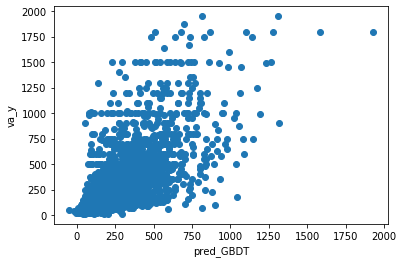

In [50]:
plt.xlabel("pred_GBDT")
plt.ylabel("va_y")
plt.scatter(pred_GBDT, va_y)

plt.show()

In [51]:
test_pred = GBDT.predict(test_df)

In [52]:
submission_X = pd.DataFrame({
    'index':test_df['id'],
    'Outcome':test_pred, 
})

In [53]:
submission_X

,index,Outcome
0,0,256.759672
1,1,124.463459
2,2,83.589094
3,3,152.683762
4,4,129.973423
...,...,...
18523,18523,188.948113
18524,18524,97.062084
18525,18525,242.206549
18526,18526,143.259785


In [54]:
submission_X.to_csv('/Users/markun/git/SIGNATE/ai_quest/submission_X.csv', header = False, index = False )